In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [58]:
studentRegistration = pd.read_csv("studentRegistration.csv")
print(studentRegistration)

      code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
...           ...               ...         ...                ...   
32588         GGG             2014J     2640965               -4.0   
32589         GGG             2014J     2645731              -23.0   
32590         GGG             2014J     2648187             -129.0   
32591         GGG             2014J     2679821              -49.0   
32592         GGG             2014J     2684003              -28.0   

       date_unregistration  
0                      NaN  
1                      NaN  
2                     12.0  
3                      NaN  
4             

In [59]:
num_examples, num_features = studentRegistration.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 32593
Number of features: 5


In [60]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [61]:
#Displaying data types
print(studentRegistration.dtypes)

#Displaying descriptive statistics
print(studentRegistration.describe())

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object
         id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e+05         -29.000000           109.000000
max    2.716795e+06         167.000000           444.000000


In [62]:
studentRegistration.describe #A little prettier descriptive statistics

<bound method NDFrame.describe of       code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
...           ...               ...         ...                ...   
32588         GGG             2014J     2640965               -4.0   
32589         GGG             2014J     2645731              -23.0   
32590         GGG             2014J     2648187             -129.0   
32591         GGG             2014J     2679821              -49.0   
32592         GGG             2014J     2684003              -28.0   

       date_unregistration  
0                      NaN  
1                      NaN  
2                     12.0  
3        

In [63]:
#Descriptive data statistics
numerical_columns = studentRegistration.select_dtypes(include=['int', 'float'])

for column in numerical_columns.columns:
    column_mean = numerical_columns[column].mean()
    column_std = numerical_columns[column].std()
    column_median = numerical_columns[column].median()
    
    print(f"Feature: {column}")
    print(f"Mean: {column_mean}")
    print(f"Standard Deviation: {column_std}")
    print(f"Median: {column_median}\n")

Feature: id_student
Mean: 706687.6691314086
Standard Deviation: 549167.3138552054
Median: 590310.0

Feature: date_registration
Mean: -69.4113002335013
Standard Deviation: 49.260522115018794
Median: -57.0

Feature: date_unregistration
Mean: 49.757644956314536
Standard Deviation: 82.460889958136
Median: 27.0



In [64]:
studentRegistration.nunique() #Checking if there are any monotonous attributes

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

In [65]:
studentRegistration.drop(('id_student'), axis = 1, inplace= True) #Removing monotonous attributes
studentRegistration

,code_module,code_presentation,date_registration,date_unregistration
0,AAA,2013J,-159.0,NaN
1,AAA,2013J,-53.0,NaN
2,AAA,2013J,-92.0,12.0
3,AAA,2013J,-52.0,NaN
4,AAA,2013J,-176.0,NaN
...,...,...,...,...
32588,GGG,2014J,-4.0,NaN
32589,GGG,2014J,-23.0,NaN
32590,GGG,2014J,-129.0,NaN
32591,GGG,2014J,-49.0,101.0


In [66]:
studentRegistration.isna().sum() #Checking for missing values

code_module                0
code_presentation          0
date_registration         45
date_unregistration    22521
dtype: int64

In [67]:
studentRegistration['date_registration'].fillna(studentRegistration['date_registration'].mode()[0], inplace=True)

#studentRegistration_tmp = studentRegistration.copy()

#Inserting mean value where this information is missing
#studentRegistration_tmp.loc[studentRegistration_tmp.date_registration.isna(),'date_registration'] = studentRegistration_tmp.loc[:,'date_registration'].mean() 

In [68]:
studentRegistration['date_unregistration'].fillna(studentRegistration['date_unregistration'].mode()[0], inplace=True)

#studentRegistration_tmp2 = studentRegistration.copy()

#Inserting mean value where this information is missing
#studentRegistration_tmp2.loc[studentRegistration_tmp2.date_unregistration.isna(),'date_unregistration'] = studentRegistration_tmp2.loc[:,'date_unregistration'].mean() 

In [69]:
studentRegistration.isna().sum()

code_module            0
code_presentation      0
date_registration      0
date_unregistration    0
dtype: int64

In [70]:
studentRegistration_ohe=studentRegistration.copy()
#Definiramo encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(studentRegistration[['code_module','code_presentation']])
#Transformacija podataka
studentRegistration_ohe = encoder.transform(studentRegistration[['code_module','code_presentation']])
studentRegistration_ohe = pd.DataFrame(studentRegistration_ohe.toarray(), columns=encoder.get_feature_names_out(['code_module','code_presentation']))
studentRegistration_ohe

,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32588,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32589,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32590,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32591,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [71]:
studentRegistration= pd.concat((studentRegistration, studentRegistration_ohe), axis=1)
studentRegistration

,code_module,code_presentation,date_registration,date_unregistration,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,-159.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AAA,2013J,-53.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,AAA,2013J,-92.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,AAA,2013J,-52.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,AAA,2013J,-176.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,-4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32589,GGG,2014J,-23.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32590,GGG,2014J,-129.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32591,GGG,2014J,-49.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [72]:
filename="studentRegistrationF.csv"
studentRegistration.to_csv(filename, index=False)
print(pd.read_csv(filename))

      code_module code_presentation  date_registration  date_unregistration  \
0             AAA             2013J             -159.0                 12.0   
1             AAA             2013J              -53.0                 12.0   
2             AAA             2013J              -92.0                 12.0   
3             AAA             2013J              -52.0                 12.0   
4             AAA             2013J             -176.0                 12.0   
...           ...               ...                ...                  ...   
32588         GGG             2014J               -4.0                 12.0   
32589         GGG             2014J              -23.0                 12.0   
32590         GGG             2014J             -129.0                 12.0   
32591         GGG             2014J              -49.0                101.0   
32592         GGG             2014J              -28.0                 12.0   

       code_module_AAA  code_module_BBB  code_modul

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
studentRegistrationF = pd.read_csv("studentRegistrationF.csv")
studentRegistrationF

,code_module,code_presentation,date_registration,date_unregistration,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,-159.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AAA,2013J,-53.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,AAA,2013J,-92.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,AAA,2013J,-52.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,AAA,2013J,-176.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,-4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32589,GGG,2014J,-23.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32590,GGG,2014J,-129.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32591,GGG,2014J,-49.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


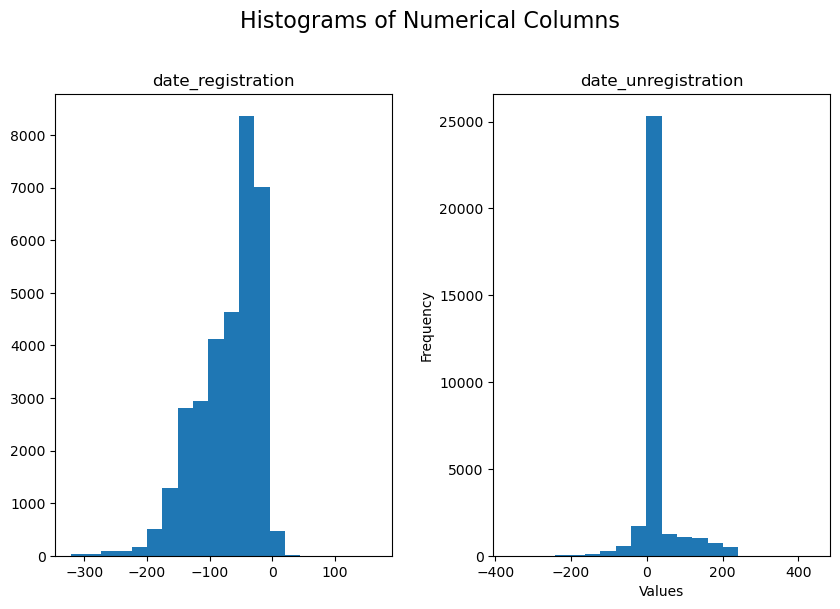

In [74]:
numerical_columns = ['date_registration', 'date_unregistration']

#Plotting histograms
studentRegistrationF[numerical_columns].hist(bins=20, figsize=(10, 6), grid=False)

#Adding labels and title
plt.suptitle('Histograms of Numerical Columns', y=1.02, fontsize=16)
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

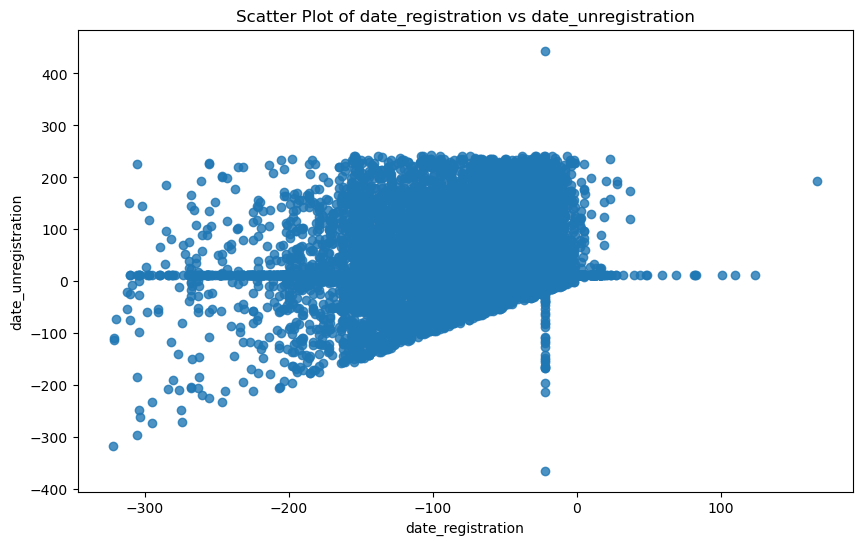

In [76]:
#Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(studentRegistrationF['date_registration'], studentRegistrationF['date_unregistration'], marker='o', alpha=0.8)
plt.xlabel('date_registration')
plt.ylabel('date_unregistration')
plt.title('Scatter Plot of date_registration vs date_unregistration')
plt.show()

In [98]:
studentInfo = pd.read_csv("studentInfo.csv")
print(studentInfo)

      code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band a

In [99]:
num_examples, num_features = studentInfo.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 32593
Number of features: 12


In [100]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [101]:
#Displaying data types
print(studentInfo.dtypes)

#Displaying descriptive statistics
print(studentInfo.describe())

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object
         id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05              0.163225        79.758691
std    5.491673e+05              0.479758        41.071900
min    3.733000e+03              0.000000        30.000000
25%    5.085730e+05              0.000000        60.000000
50%    5.903100e+05              0.000000        60.000000
75%    6.444530e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000


In [102]:
studentInfo.describe #A little prettier descriptive statistics

<bound method NDFrame.describe of       code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

     

In [103]:
#Descriptive data statistics
numerical_columns = studentInfo.select_dtypes(include=['int', 'float'])

for column in numerical_columns.columns:
    column_mean = numerical_columns[column].mean()
    column_std = numerical_columns[column].std()
    column_median = numerical_columns[column].median()
    
    print(f"Feature: {column}")
    print(f"Mean: {column_mean}")
    print(f"Standard Deviation: {column_std}")
    print(f"Median: {column_median}\n")

Feature: id_student
Mean: 706687.6691314086
Standard Deviation: 549167.3138552054
Median: 590310.0

Feature: num_of_prev_attempts
Mean: 0.16322523241186757
Standard Deviation: 0.47975847416297385
Median: 0.0

Feature: studied_credits
Mean: 79.75869051636855
Standard Deviation: 41.07190026123349
Median: 60.0



In [104]:
studentInfo.nunique() #Checking if there are any monotonous attributes

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [105]:
studentInfo.drop(('id_student'), axis = 1, inplace= True) #Removing monotonous attributes
studentInfo

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [106]:
studentInfo.isna().sum() #Checking for missing values

code_module                0
code_presentation          0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [107]:
studentInfo['imd_band'].fillna(studentInfo['imd_band'].mode()[0], inplace=True)

In [108]:
studentInfo.isna().sum()

code_module             0
code_presentation       0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [109]:
studentInfo_ohe=studentInfo.copy()
#Definiramo encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(studentInfo[['gender','region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result', 'studied_credits']])
#Transformacija podataka
studentInfo_ohe = encoder.transform(studentInfo[['gender','region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result', 'studied_credits']])
studentInfo_ohe = pd.DataFrame(studentInfo_ohe.toarray(), columns=encoder.get_feature_names_out(['gender','region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result', 'studied_credits']))
studentInfo_ohe

,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,...,studied_credits_370,studied_credits_390,studied_credits_400,studied_credits_420,studied_credits_430,studied_credits_480,studied_credits_540,studied_credits_585,studied_credits_630,studied_credits_655
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
studentInfo= pd.concat((studentInfo, studentInfo_ohe), axis=1)
studentInfo

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,studied_credits_370,studied_credits_390,studied_credits_400,studied_credits_420,studied_credits_430,studied_credits_480,studied_credits_540,studied_credits_585,studied_credits_630,studied_credits_655
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
le = LabelEncoder()
studentInfo["EthnicGroup"] =le.fit_transform(studentInfo["code_module"])
studentInfo["ParentEduc"] =le.fit_transform(studentInfo["code_presentation"])
studentInfo["TestPrep"] =le.fit_transform(studentInfo["num_of_prev_attempts"]) #Ordinalno -> label encoder
studentInfo

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,studied_credits_420,studied_credits_430,studied_credits_480,studied_credits_540,studied_credits_585,studied_credits_630,studied_credits_655,EthnicGroup,ParentEduc,TestPrep
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0
32589,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0
32590,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0
32591,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0


In [112]:
filename="studentInfoF.csv"
studentInfo.to_csv(filename, index=False)
print(pd.read_csv(filename))

      code_module code_presentation gender                region  \
0             AAA             2013J      M   East Anglian Region   
1             AAA             2013J      F              Scotland   
2             AAA             2013J      F  North Western Region   
3             AAA             2013J      F     South East Region   
4             AAA             2013J      F  West Midlands Region   
...           ...               ...    ...                   ...   
32588         GGG             2014J      F                 Wales   
32589         GGG             2014J      F   East Anglian Region   
32590         GGG             2014J      F          South Region   
32591         GGG             2014J      F     South East Region   
32592         GGG             2014J      F      Yorkshire Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     55<=                     0   
1           HE Qualification   20-30%  

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
studentInfoF = pd.read_csv("studentInfoF.csv")
studentInfoF

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,studied_credits_420,studied_credits_430,studied_credits_480,studied_credits_540,studied_credits_585,studied_credits_630,studied_credits_655,EthnicGroup,ParentEduc,TestPrep
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0
32589,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0
32590,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0
32591,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,0


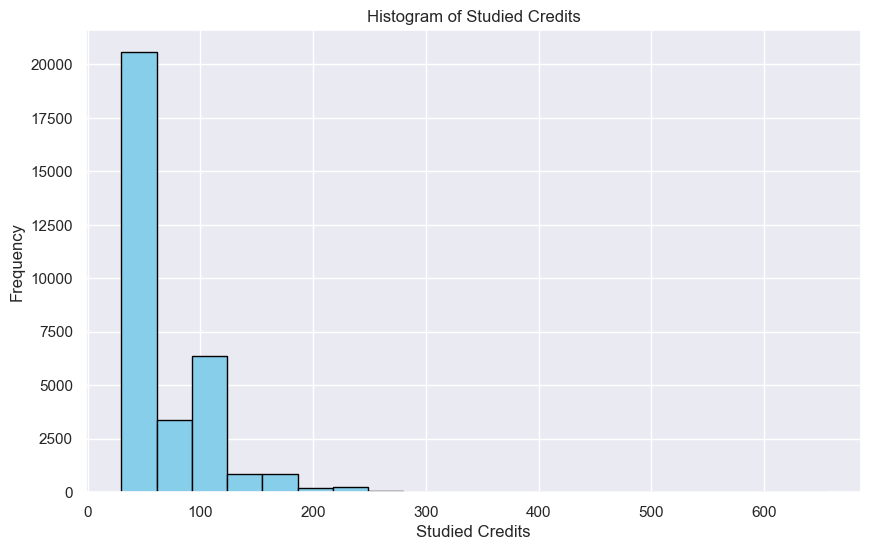

In [123]:
plt.figure(figsize=(10, 6))

plt.hist(studentInfoF['studied_credits'], bins=20, color='skyblue', edgecolor='black')

#Adding labels and title
plt.xlabel('Studied Credits')
plt.ylabel('Frequency')
plt.title('Histogram of Studied Credits')

plt.show()

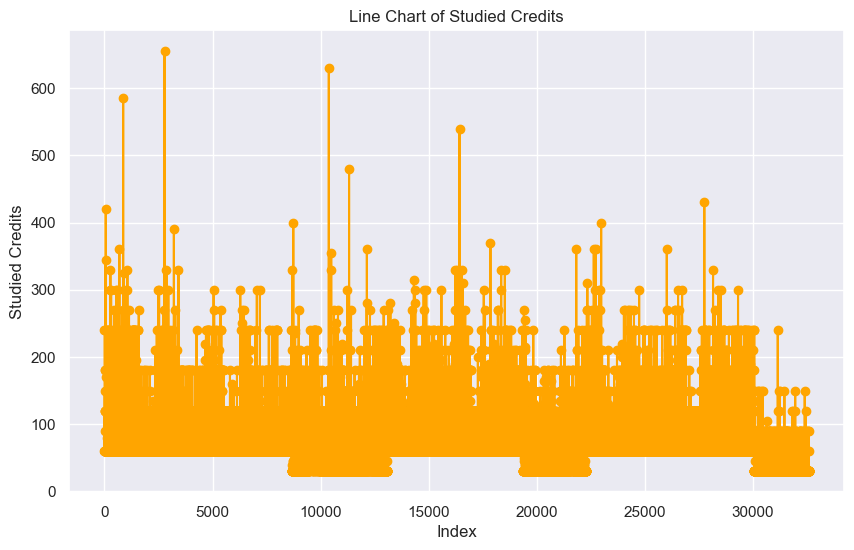

In [124]:
plt.figure(figsize=(10, 6))

plt.plot(studentInfoF['studied_credits'], color='orange', marker='o', linestyle='-')

#Adding labels and title
plt.xlabel('Index')
plt.ylabel('Studied Credits')
plt.title('Line Chart of Studied Credits')

plt.show()

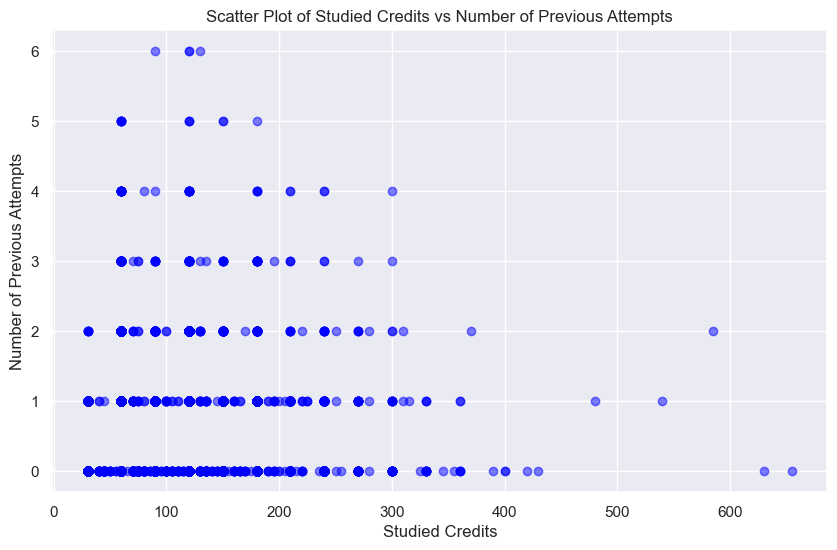

In [125]:
plt.figure(figsize=(10, 6))

plt.scatter(studentInfoF['studied_credits'], studentInfoF['num_of_prev_attempts'], color='blue', alpha=0.5)

#Adding labels and title
plt.xlabel('Studied Credits')
plt.ylabel('Number of Previous Attempts')
plt.title('Scatter Plot of Studied Credits vs Number of Previous Attempts')

plt.show()

In [126]:
studentVle = pd.read_csv("studentVle.csv")
print(studentVle)

         code_module code_presentation  id_student  id_site  date  sum_click
0                AAA             2013J       28400   546652   -10          4
1                AAA             2013J       28400   546652   -10          1
2                AAA             2013J       28400   546652   -10          1
3                AAA             2013J       28400   546614   -10         11
4                AAA             2013J       28400   546714   -10          1
...              ...               ...         ...      ...   ...        ...
10655275         GGG             2014J      675811   896943   269          3
10655276         GGG             2014J      675578   896943   269          1
10655277         GGG             2014J      654064   896943   269          3
10655278         GGG             2014J      654064   896939   269          1
10655279         GGG             2014J      654064   896939   269          1

[10655280 rows x 6 columns]


In [127]:
num_examples, num_features = studentVle.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 10655280
Number of features: 6


In [129]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [130]:
#Displaying data types
print(studentVle.dtypes)

#Displaying descriptive statistics
print(studentVle.describe())

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object
         id_student       id_site          date     sum_click
count  1.065528e+07  1.065528e+07  1.065528e+07  1.065528e+07
mean   7.333336e+05  7.383234e+05  9.517400e+01  3.716946e+00
std    5.827060e+05  1.312196e+05  7.607130e+01  8.849047e+00
min    6.516000e+03  5.267210e+05 -2.500000e+01  1.000000e+00
25%    5.077430e+05  6.735190e+05  2.500000e+01  1.000000e+00
50%    5.882360e+05  7.300690e+05  8.600000e+01  2.000000e+00
75%    6.464840e+05  8.770300e+05  1.560000e+02  3.000000e+00
max    2.698588e+06  1.049562e+06  2.690000e+02  6.977000e+03


In [131]:
studentVle.describe #A little prettier descriptive statistics

<bound method NDFrame.describe of          code_module code_presentation  id_student  id_site  date  sum_click
0                AAA             2013J       28400   546652   -10          4
1                AAA             2013J       28400   546652   -10          1
2                AAA             2013J       28400   546652   -10          1
3                AAA             2013J       28400   546614   -10         11
4                AAA             2013J       28400   546714   -10          1
...              ...               ...         ...      ...   ...        ...
10655275         GGG             2014J      675811   896943   269          3
10655276         GGG             2014J      675578   896943   269          1
10655277         GGG             2014J      654064   896943   269          3
10655278         GGG             2014J      654064   896939   269          1
10655279         GGG             2014J      654064   896939   269          1

[10655280 rows x 6 columns]>

In [132]:
#Descriptive data statistics
numerical_columns = studentVle.select_dtypes(include=['int', 'float'])

for column in numerical_columns.columns:
    column_mean = numerical_columns[column].mean()
    column_std = numerical_columns[column].std()
    column_median = numerical_columns[column].median()
    
    print(f"Feature: {column}")
    print(f"Mean: {column_mean}")
    print(f"Standard Deviation: {column_std}")
    print(f"Median: {column_median}\n")

Feature: id_student
Mean: 733333.5668717293
Standard Deviation: 582705.9825111441
Median: 588236.0

Feature: id_site
Mean: 738323.416399569
Standard Deviation: 131219.62216312313
Median: 730069.0

Feature: date
Mean: 95.17399955702713
Standard Deviation: 76.0713008408721
Median: 86.0

Feature: sum_click
Mean: 3.7169458709672574
Standard Deviation: 8.849046654797062
Median: 2.0



In [133]:
studentVle.nunique() #Checking if there are any monotonous attributes

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
dtype: int64

In [134]:
studentVle.drop(('id_student'), axis = 1, inplace= True) #Removing monotonous attributes
studentVle

,code_module,code_presentation,id_site,date,sum_click
0,AAA,2013J,546652,-10,4
1,AAA,2013J,546652,-10,1
2,AAA,2013J,546652,-10,1
3,AAA,2013J,546614,-10,11
4,AAA,2013J,546714,-10,1
...,...,...,...,...,...
10655275,GGG,2014J,896943,269,3
10655276,GGG,2014J,896943,269,1
10655277,GGG,2014J,896943,269,3
10655278,GGG,2014J,896939,269,1


In [135]:
studentVle.isna().sum() #Checking for missing values

code_module          0
code_presentation    0
id_site              0
date                 0
sum_click            0
dtype: int64

In [143]:
studentVle_ohe=studentVle.head(32593)
#Definiramo encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(studentVle[['code_module', 'code_presentation', 'id_site', 'date']])
#Transformacija podataka
studentVle_ohe = encoder.transform(studentVle[['code_module', 'code_presentation', 'id_site', 'date']])
studentVle_ohe = pd.DataFrame(studentVle_ohe.toarray(), columns=encoder.get_feature_names_out(['code_module', 'code_presentation', 'id_site', 'date']))
studentVle_ohe

#MemoryError: Unable to allocate 522. GiB for an array with shape (10655280, 6574) and data type float64
#Ovo ne znam kako da rijesim

MemoryError: Unable to allocate 522. GiB for an array with shape (10655280, 6574) and data type float64

In [ ]:
#studentVle= pd.concat((studentVle, studentVle_ohe), axis=1)
#studentVle

In [140]:
le = LabelEncoder()
studentVle["sum_click"] =le.fit_transform(studentVle["sum_click"])
studentVle

,code_module,code_presentation,id_site,date,sum_click
0,AAA,2013J,546652,-10,3
1,AAA,2013J,546652,-10,0
2,AAA,2013J,546652,-10,0
3,AAA,2013J,546614,-10,10
4,AAA,2013J,546714,-10,0
...,...,...,...,...,...
10655275,GGG,2014J,896943,269,2
10655276,GGG,2014J,896943,269,0
10655277,GGG,2014J,896943,269,2
10655278,GGG,2014J,896939,269,0


In [141]:
filename="studentVleF.csv"
studentVle.to_csv(filename, index=False)
print(pd.read_csv(filename))

         code_module code_presentation  id_site  date  sum_click
0                AAA             2013J   546652   -10          3
1                AAA             2013J   546652   -10          0
2                AAA             2013J   546652   -10          0
3                AAA             2013J   546614   -10         10
4                AAA             2013J   546714   -10          0
...              ...               ...      ...   ...        ...
10655275         GGG             2014J   896943   269          2
10655276         GGG             2014J   896943   269          0
10655277         GGG             2014J   896943   269          2
10655278         GGG             2014J   896939   269          0
10655279         GGG             2014J   896939   269          0

[10655280 rows x 5 columns]


In [142]:
studentVleF = pd.read_csv("studentVleF.csv")
studentVleF

,code_module,code_presentation,id_site,date,sum_click
0,AAA,2013J,546652,-10,3
1,AAA,2013J,546652,-10,0
2,AAA,2013J,546652,-10,0
3,AAA,2013J,546614,-10,10
4,AAA,2013J,546714,-10,0
...,...,...,...,...,...
10655275,GGG,2014J,896943,269,2
10655276,GGG,2014J,896943,269,0
10655277,GGG,2014J,896943,269,2
10655278,GGG,2014J,896939,269,0


In [157]:
studentVleOpet = pd.read_csv("studentVleOpet.csv")
studentVlePls = studentVleOpet.head(32593)
print(studentVlePls)

      code_module code_presentation  id_student  id_site  date  sum_click
0             AAA             2013J       28400   546652   -10          4
1             AAA             2013J       28400   546652   -10          1
2             AAA             2013J       28400   546652   -10          1
3             AAA             2013J       28400   546614   -10         11
4             AAA             2013J       28400   546714   -10          1
...           ...               ...         ...      ...   ...        ...
32588         AAA             2013J     2566163   546879    16          1
32589         AAA             2013J     2566163   546657    16          4
32590         AAA             2013J     2566163   546614    16          5
32591         AAA             2013J     2576122   546614    16          5
32592         AAA             2013J     2574528   546659    16          1

[32593 rows x 6 columns]


In [158]:
num_examples, num_features = studentVlePls.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 32593
Number of features: 6


In [159]:
studentVlePls.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [160]:
#Displaying data types
print(studentVlePls.dtypes)

#Displaying descriptive statistics
print(studentVlePls.describe())

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object
         id_student        id_site          date     sum_click
count  3.259300e+04   32593.000000  32593.000000  32593.000000
mean   1.055286e+06  546723.388949      3.295370      4.273985
std    9.824193e+05     112.983155      8.105563      5.314286
min    1.139100e+04  546614.000000    -10.000000      1.000000
25%    2.280820e+05  546652.000000     -4.000000      1.000000
50%    4.024700e+05  546667.000000      4.000000      2.000000
75%    2.143752e+06  546871.000000     10.000000      5.000000
max    2.698257e+06  547067.000000     16.000000    144.000000


In [161]:
studentVlePls.describe #A little prettier descriptive statistics

<bound method NDFrame.describe of       code_module code_presentation  id_student  id_site  date  sum_click
0             AAA             2013J       28400   546652   -10          4
1             AAA             2013J       28400   546652   -10          1
2             AAA             2013J       28400   546652   -10          1
3             AAA             2013J       28400   546614   -10         11
4             AAA             2013J       28400   546714   -10          1
...           ...               ...         ...      ...   ...        ...
32588         AAA             2013J     2566163   546879    16          1
32589         AAA             2013J     2566163   546657    16          4
32590         AAA             2013J     2566163   546614    16          5
32591         AAA             2013J     2576122   546614    16          5
32592         AAA             2013J     2574528   546659    16          1

[32593 rows x 6 columns]>

In [162]:
#Descriptive data statistics
numerical_columns = studentVlePls.select_dtypes(include=['int', 'float'])

for column in numerical_columns.columns:
    column_mean = numerical_columns[column].mean()
    column_std = numerical_columns[column].std()
    column_median = numerical_columns[column].median()
    
    print(f"Feature: {column}")
    print(f"Mean: {column_mean}")
    print(f"Standard Deviation: {column_std}")
    print(f"Median: {column_median}\n")

Feature: id_student
Mean: 1055285.669008683
Standard Deviation: 982419.3201368933
Median: 402470.0

Feature: id_site
Mean: 546723.3889485472
Standard Deviation: 112.98315497521676
Median: 546667.0

Feature: date
Mean: 3.29537017150922
Standard Deviation: 8.105563250098434
Median: 4.0

Feature: sum_click
Mean: 4.273985211548492
Standard Deviation: 5.314285773846347
Median: 2.0



In [163]:
studentVlePls.nunique() #Checking if there are any monotonous attributes

code_module            1
code_presentation      1
id_student           376
id_site              123
date                  27
sum_click             66
dtype: int64

In [164]:
studentVlePls.isna().sum() #Checking for missing values

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [165]:
studentVlePls_ohe=studentVlePls.head(32593)
#Definiramo encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(studentVlePls[['code_module', 'code_presentation']])
#Transformacija podataka
studentVlePls_ohe = encoder.transform(studentVlePls[['code_module', 'code_presentation']])
studentVlePls_ohe = pd.DataFrame(studentVlePls_ohe.toarray(), columns=encoder.get_feature_names_out(['code_module', 'code_presentation']))
studentVlePls_ohe

,code_module_AAA,code_presentation_2013J
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
32588,1.0,1.0
32589,1.0,1.0
32590,1.0,1.0
32591,1.0,1.0


In [166]:
studentVlePls= pd.concat((studentVlePls, studentVlePls_ohe), axis=1)
studentVlePls

,code_module,code_presentation,id_student,id_site,date,sum_click,code_module_AAA,code_presentation_2013J
0,AAA,2013J,28400,546652,-10,4,1.0,1.0
1,AAA,2013J,28400,546652,-10,1,1.0,1.0
2,AAA,2013J,28400,546652,-10,1,1.0,1.0
3,AAA,2013J,28400,546614,-10,11,1.0,1.0
4,AAA,2013J,28400,546714,-10,1,1.0,1.0
...,...,...,...,...,...,...,...,...
32588,AAA,2013J,2566163,546879,16,1,1.0,1.0
32589,AAA,2013J,2566163,546657,16,4,1.0,1.0
32590,AAA,2013J,2566163,546614,16,5,1.0,1.0
32591,AAA,2013J,2576122,546614,16,5,1.0,1.0


In [167]:
filename="studentVlePlsF.csv"
studentVlePls.to_csv(filename, index=False)
print(pd.read_csv(filename))

      code_module code_presentation  id_student  id_site  date  sum_click  \
0             AAA             2013J       28400   546652   -10          4   
1             AAA             2013J       28400   546652   -10          1   
2             AAA             2013J       28400   546652   -10          1   
3             AAA             2013J       28400   546614   -10         11   
4             AAA             2013J       28400   546714   -10          1   
...           ...               ...         ...      ...   ...        ...   
32588         AAA             2013J     2566163   546879    16          1   
32589         AAA             2013J     2566163   546657    16          4   
32590         AAA             2013J     2566163   546614    16          5   
32591         AAA             2013J     2576122   546614    16          5   
32592         AAA             2013J     2574528   546659    16          1   

       code_module_AAA  code_presentation_2013J  
0                  1.0   

In [168]:
studentVlePlsF = pd.read_csv("studentVlePlsF.csv")
studentVlePlsF

,code_module,code_presentation,id_student,id_site,date,sum_click,code_module_AAA,code_presentation_2013J
0,AAA,2013J,28400,546652,-10,4,1.0,1.0
1,AAA,2013J,28400,546652,-10,1,1.0,1.0
2,AAA,2013J,28400,546652,-10,1,1.0,1.0
3,AAA,2013J,28400,546614,-10,11,1.0,1.0
4,AAA,2013J,28400,546714,-10,1,1.0,1.0
...,...,...,...,...,...,...,...,...
32588,AAA,2013J,2566163,546879,16,1,1.0,1.0
32589,AAA,2013J,2566163,546657,16,4,1.0,1.0
32590,AAA,2013J,2566163,546614,16,5,1.0,1.0
32591,AAA,2013J,2576122,546614,16,5,1.0,1.0


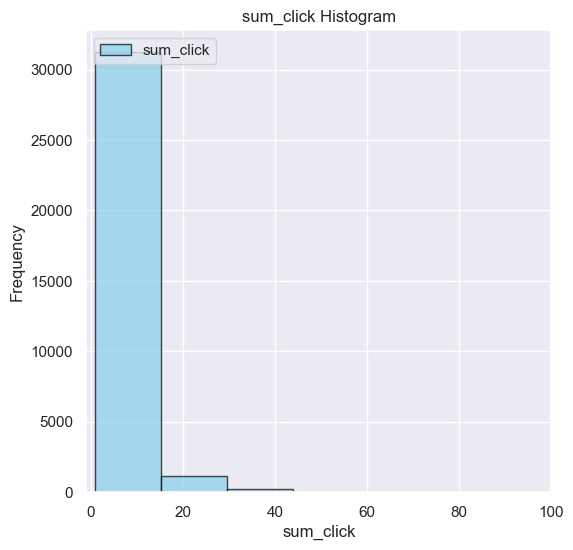

In [169]:
sum_click = studentVlePlsF['sum_click']

#Histogram
plt.figure(figsize=(6, 6))
plt.hist(sum_click, bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='sum_click')

#Naslovi
plt.title('sum_click Histogram')
plt.xlabel('sum_click')
plt.ylabel('Frequency')

#Grid i legenda
plt.grid(True)
plt.legend(loc='upper left')
plt.xlim(-1, 100)

plt.show()

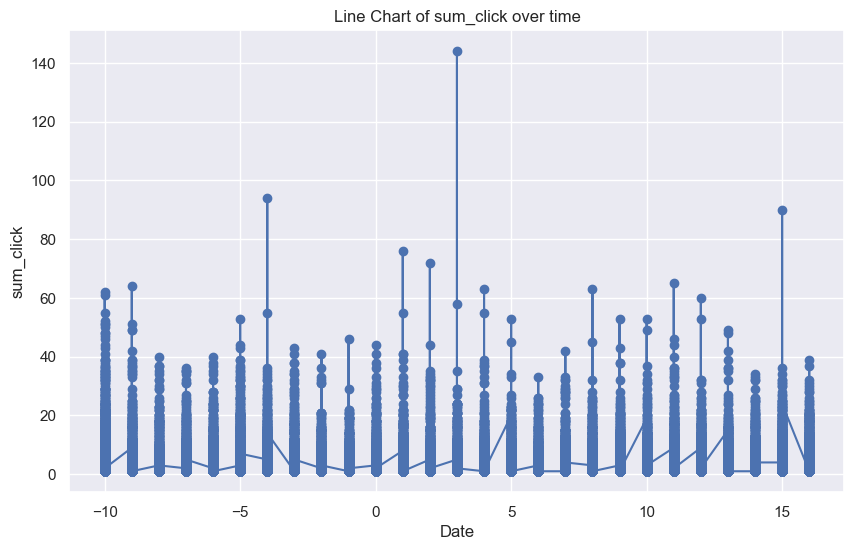

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(studentVlePlsF['date'], studentVlePlsF['sum_click'], marker='o', linestyle='-', color='b')
plt.title('Line Chart of sum_click over time')
plt.xlabel('Date')
plt.ylabel('sum_click')
plt.grid(True)
plt.show()

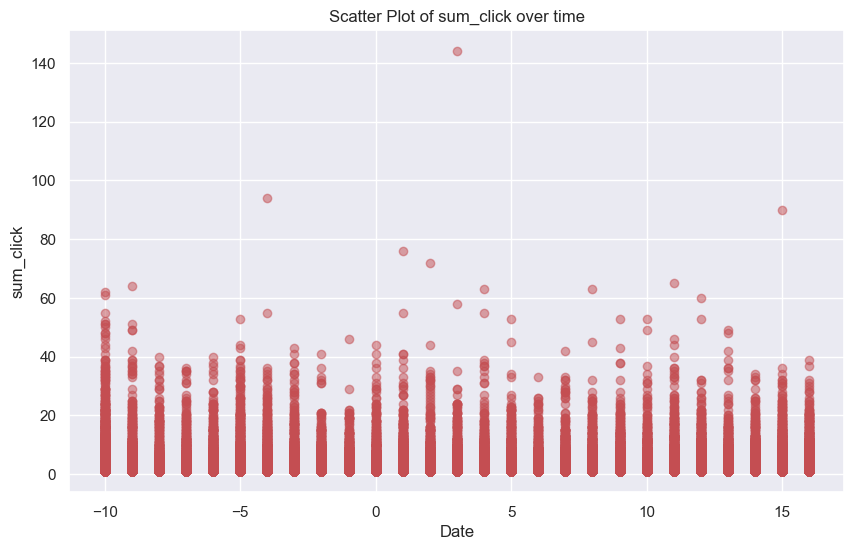

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(studentVlePlsF['date'], studentVlePlsF['sum_click'], color='r', alpha=0.5)
plt.title('Scatter Plot of sum_click over time')
plt.xlabel('Date')
plt.ylabel('sum_click')
plt.grid(True)
plt.show()

In [173]:
vle = pd.read_csv("vle.csv")
print(vle)

      id_site code_module code_presentation activity_type  week_from  week_to
0      546943         AAA             2013J      resource        NaN      NaN
1      546712         AAA             2013J     oucontent        NaN      NaN
2      546998         AAA             2013J      resource        NaN      NaN
3      546888         AAA             2013J           url        NaN      NaN
4      547035         AAA             2013J      resource        NaN      NaN
...       ...         ...               ...           ...        ...      ...
6359   897063         GGG             2014J      resource        NaN      NaN
6360   897109         GGG             2014J      resource        NaN      NaN
6361   896965         GGG             2014J     oucontent        NaN      NaN
6362   897060         GGG             2014J      resource        NaN      NaN
6363   897100         GGG             2014J      resource        NaN      NaN

[6364 rows x 6 columns]


In [174]:
num_examples, num_features = vle.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 6364
Number of features: 6


In [175]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [176]:
#Displaying data types
print(vle.dtypes)

#Displaying descriptive statistics
print(vle.describe())

id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object
            id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.300965e+05    15.000000    15.000000
75%    8.140162e+05    22.000000    22.000000
max    1.077905e+06    29.000000    29.000000


In [177]:
vle.describe #A little prettier descriptive statistics

<bound method NDFrame.describe of       id_site code_module code_presentation activity_type  week_from  week_to
0      546943         AAA             2013J      resource        NaN      NaN
1      546712         AAA             2013J     oucontent        NaN      NaN
2      546998         AAA             2013J      resource        NaN      NaN
3      546888         AAA             2013J           url        NaN      NaN
4      547035         AAA             2013J      resource        NaN      NaN
...       ...         ...               ...           ...        ...      ...
6359   897063         GGG             2014J      resource        NaN      NaN
6360   897109         GGG             2014J      resource        NaN      NaN
6361   896965         GGG             2014J     oucontent        NaN      NaN
6362   897060         GGG             2014J      resource        NaN      NaN
6363   897100         GGG             2014J      resource        NaN      NaN

[6364 rows x 6 columns]>

In [178]:
#Descriptive data statistics
numerical_columns = vle.select_dtypes(include=['int', 'float'])

for column in numerical_columns.columns:
    column_mean = numerical_columns[column].mean()
    column_std = numerical_columns[column].std()
    column_median = numerical_columns[column].median()
    
    print(f"Feature: {column}")
    print(f"Mean: {column_mean}")
    print(f"Standard Deviation: {column_std}")
    print(f"Median: {column_median}\n")

Feature: id_site
Mean: 726099.094123193
Standard Deviation: 128315.13747347395
Median: 730096.5

Feature: week_from
Mean: 15.2042818911686
Standard Deviation: 8.79286538331151
Median: 15.0

Feature: week_to
Mean: 15.214986619090098
Standard Deviation: 8.779805777261126
Median: 15.0



In [179]:
vle.nunique() #Checking if there are any monotonous attributes

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

In [180]:
vle.drop(('id_site'), axis = 1, inplace= True) #Removing monotonous attributes
vle

,code_module,code_presentation,activity_type,week_from,week_to
0,AAA,2013J,resource,NaN,NaN
1,AAA,2013J,oucontent,NaN,NaN
2,AAA,2013J,resource,NaN,NaN
3,AAA,2013J,url,NaN,NaN
4,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...
6359,GGG,2014J,resource,NaN,NaN
6360,GGG,2014J,resource,NaN,NaN
6361,GGG,2014J,oucontent,NaN,NaN
6362,GGG,2014J,resource,NaN,NaN


In [181]:
vle.isna().sum() #Checking for missing values

code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [182]:
vle['week_from'].fillna(vle['week_from'].mode()[0], inplace=True)

In [183]:
vle['week_to'].fillna(vle['week_to'].mode()[0], inplace=True)

In [184]:
vle.isna().sum()

code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

In [185]:
vle_ohe=vle.copy()
#Definiramo encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(vle[['code_module','code_presentation', 'activity_type']])
#Transformacija podataka
vle_ohe = encoder.transform(vle[['code_module','code_presentation', 'activity_type']])
vle_ohe = pd.DataFrame(vle_ohe.toarray(), columns=encoder.get_feature_names_out(['code_module','code_presentation', 'activity_type']))
vle_ohe

,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,...,activity_type_ouelluminate,activity_type_ouwiki,activity_type_page,activity_type_questionnaire,activity_type_quiz,activity_type_repeatactivity,activity_type_resource,activity_type_sharedsubpage,activity_type_subpage,activity_type_url
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6360,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6362,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [186]:
vle= pd.concat((vle, vle_ohe), axis=1)
vle

,code_module,code_presentation,activity_type,week_from,week_to,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,...,activity_type_ouelluminate,activity_type_ouwiki,activity_type_page,activity_type_questionnaire,activity_type_quiz,activity_type_repeatactivity,activity_type_resource,activity_type_sharedsubpage,activity_type_subpage,activity_type_url
0,AAA,2013J,resource,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,AAA,2013J,oucontent,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,resource,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,AAA,2013J,url,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,AAA,2013J,resource,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359,GGG,2014J,resource,18.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6360,GGG,2014J,resource,18.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6361,GGG,2014J,oucontent,18.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6362,GGG,2014J,resource,18.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [187]:
filename="vleF.csv"
vle.to_csv(filename, index=False)
print(pd.read_csv(filename))

     code_module code_presentation activity_type  week_from  week_to  \
0            AAA             2013J      resource       18.0     18.0   
1            AAA             2013J     oucontent       18.0     18.0   
2            AAA             2013J      resource       18.0     18.0   
3            AAA             2013J           url       18.0     18.0   
4            AAA             2013J      resource       18.0     18.0   
...          ...               ...           ...        ...      ...   
6359         GGG             2014J      resource       18.0     18.0   
6360         GGG             2014J      resource       18.0     18.0   
6361         GGG             2014J     oucontent       18.0     18.0   
6362         GGG             2014J      resource       18.0     18.0   
6363         GGG             2014J      resource       18.0     18.0   

      code_module_AAA  code_module_BBB  code_module_CCC  code_module_DDD  \
0                 1.0              0.0              0.0    

In [188]:
vleF = pd.read_csv("vleF.csv")
vleF

,code_module,code_presentation,activity_type,week_from,week_to,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,...,activity_type_ouelluminate,activity_type_ouwiki,activity_type_page,activity_type_questionnaire,activity_type_quiz,activity_type_repeatactivity,activity_type_resource,activity_type_sharedsubpage,activity_type_subpage,activity_type_url
0,AAA,2013J,resource,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,AAA,2013J,oucontent,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,resource,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,AAA,2013J,url,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,AAA,2013J,resource,18.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359,GGG,2014J,resource,18.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6360,GGG,2014J,resource,18.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6361,GGG,2014J,oucontent,18.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6362,GGG,2014J,resource,18.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


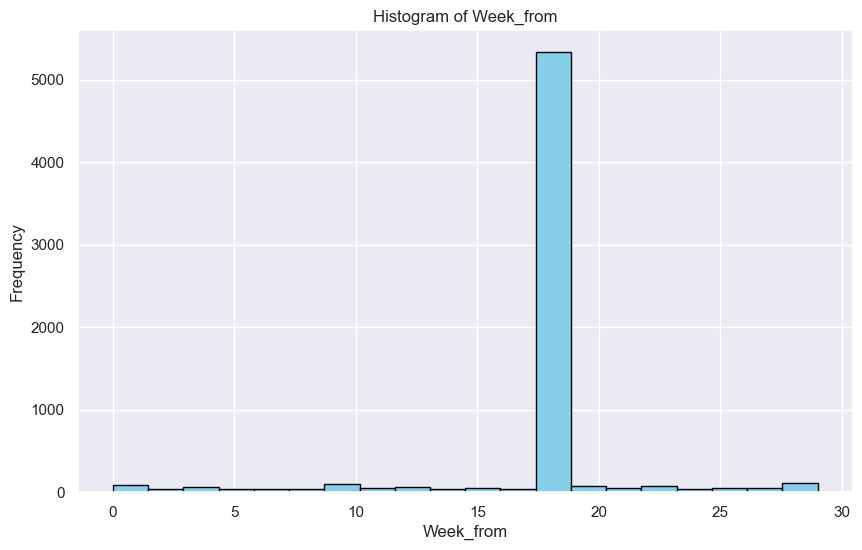

In [189]:
plt.figure(figsize=(10, 6))
vleF['week_from'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Week_from')
plt.xlabel('Week_from')
plt.ylabel('Frequency')
plt.show()

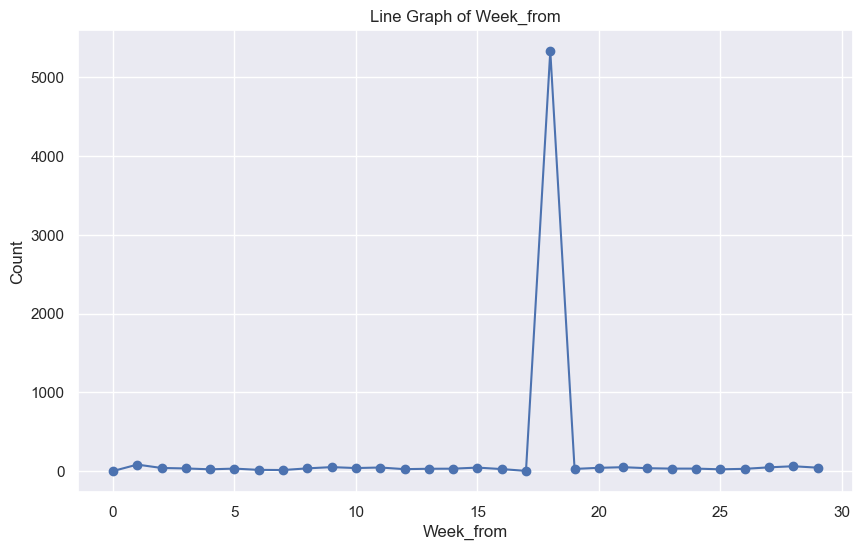

In [190]:
plt.figure(figsize=(10, 6))
vleF['week_from'].value_counts().sort_index().plot(marker='o')
plt.title('Line Graph of Week_from')
plt.xlabel('Week_from')
plt.ylabel('Count')
plt.grid(True)
plt.show()

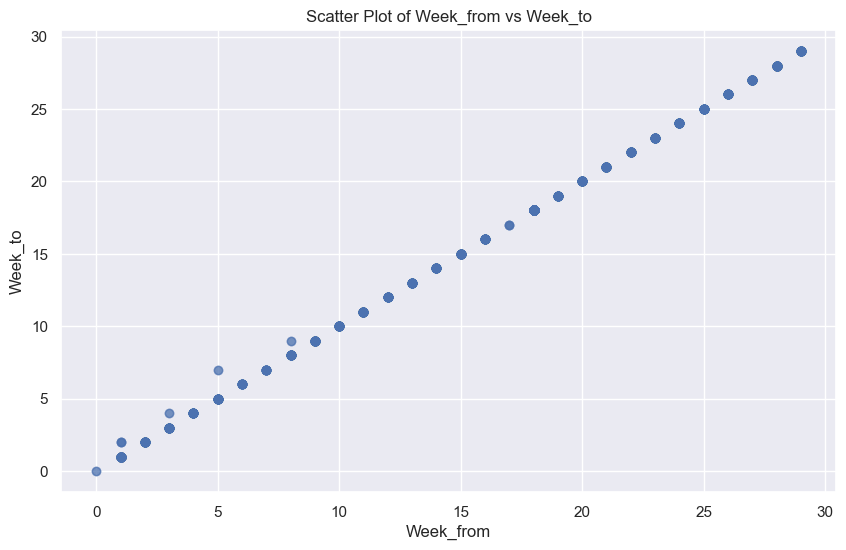

In [191]:
plt.figure(figsize=(10, 6))
plt.scatter(vleF['week_from'], vleF['week_to'], alpha=0.5)
plt.title('Scatter Plot of Week_from vs Week_to')
plt.xlabel('Week_from')
plt.ylabel('Week_to')
plt.grid(True)
plt.show()

In [192]:
assessments = pd.read_csv("assessments.csv")
print(assessments)

    code_module code_presentation  id_assessment assessment_type   date  \
0           AAA             2013J           1752             TMA   19.0   
1           AAA             2013J           1753             TMA   54.0   
2           AAA             2013J           1754             TMA  117.0   
3           AAA             2013J           1755             TMA  166.0   
4           AAA             2013J           1756             TMA  215.0   
..          ...               ...            ...             ...    ...   
201         GGG             2014J          37443             CMA  229.0   
202         GGG             2014J          37435             TMA   61.0   
203         GGG             2014J          37436             TMA  124.0   
204         GGG             2014J          37437             TMA  173.0   
205         GGG             2014J          37444            Exam  229.0   

     weight  
0      10.0  
1      20.0  
2      20.0  
3      20.0  
4      30.0  
..      ...  
2

In [193]:
num_examples, num_features = assessments.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 206
Number of features: 6


In [194]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [195]:
#Displaying data types
print(assessments.dtypes)

#Displaying descriptive statistics
print(assessments.describe())

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object
       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000


In [196]:
assessments.describe #A little prettier descriptive statistics

<bound method NDFrame.describe of     code_module code_presentation  id_assessment assessment_type   date  \
0           AAA             2013J           1752             TMA   19.0   
1           AAA             2013J           1753             TMA   54.0   
2           AAA             2013J           1754             TMA  117.0   
3           AAA             2013J           1755             TMA  166.0   
4           AAA             2013J           1756             TMA  215.0   
..          ...               ...            ...             ...    ...   
201         GGG             2014J          37443             CMA  229.0   
202         GGG             2014J          37435             TMA   61.0   
203         GGG             2014J          37436             TMA  124.0   
204         GGG             2014J          37437             TMA  173.0   
205         GGG             2014J          37444            Exam  229.0   

     weight  
0      10.0  
1      20.0  
2      20.0  
3      20

In [197]:
#Descriptive data statistics
numerical_columns = assessments.select_dtypes(include=['int', 'float'])

for column in numerical_columns.columns:
    column_mean = numerical_columns[column].mean()
    column_std = numerical_columns[column].std()
    column_median = numerical_columns[column].median()
    
    print(f"Feature: {column}")
    print(f"Mean: {column_mean}")
    print(f"Standard Deviation: {column_std}")
    print(f"Median: {column_median}\n")

Feature: id_assessment
Mean: 26473.97572815534
Standard Deviation: 10098.625521273687
Median: 25364.5

Feature: date
Mean: 145.00512820512822
Standard Deviation: 76.00111891714978
Median: 152.0

Feature: weight
Mean: 20.87378640776699
Standard Deviation: 30.38422395904127
Median: 12.5



In [198]:
assessments.nunique() #Checking if there are any monotonous attributes

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [199]:
assessments.drop(('id_assessment'), axis = 1, inplace= True) #Removing monotonous attributes
assessments

,code_module,code_presentation,assessment_type,date,weight
0,AAA,2013J,TMA,19.0,10.0
1,AAA,2013J,TMA,54.0,20.0
2,AAA,2013J,TMA,117.0,20.0
3,AAA,2013J,TMA,166.0,20.0
4,AAA,2013J,TMA,215.0,30.0
...,...,...,...,...,...
201,GGG,2014J,CMA,229.0,0.0
202,GGG,2014J,TMA,61.0,0.0
203,GGG,2014J,TMA,124.0,0.0
204,GGG,2014J,TMA,173.0,0.0


In [200]:
assessments.isna().sum() #Checking for missing values

code_module           0
code_presentation     0
assessment_type       0
date                 11
weight                0
dtype: int64

In [201]:
assessments['date'].fillna(assessments['date'].mode()[0], inplace=True)

In [202]:
assessments.isna().sum()

code_module          0
code_presentation    0
assessment_type      0
date                 0
weight               0
dtype: int64

In [203]:
assessments_ohe=assessments.copy()
#Definiramo encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(assessments[['code_module','code_presentation']])
#Transformacija podataka
assessments_ohe = encoder.transform(assessments[['code_module','code_presentation']])
assessments_ohe = pd.DataFrame(assessments_ohe.toarray(), columns=encoder.get_feature_names_out(['code_module','code_presentation']))
assessments_ohe

,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
201,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
203,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
204,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [204]:
assessments= pd.concat((assessments, assessments_ohe), axis=1)
assessments

,code_module,code_presentation,assessment_type,date,weight,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,TMA,19.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AAA,2013J,TMA,54.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,AAA,2013J,TMA,117.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,AAA,2013J,TMA,166.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,AAA,2013J,TMA,215.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,GGG,2014J,CMA,229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
202,GGG,2014J,TMA,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
203,GGG,2014J,TMA,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
204,GGG,2014J,TMA,173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [205]:
le = LabelEncoder()
assessments["assessment_type"] =le.fit_transform(assessments["assessment_type"])
assessments

,code_module,code_presentation,assessment_type,date,weight,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,2,19.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AAA,2013J,2,54.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,AAA,2013J,2,117.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,AAA,2013J,2,166.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,AAA,2013J,2,215.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,GGG,2014J,0,229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
202,GGG,2014J,2,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
203,GGG,2014J,2,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
204,GGG,2014J,2,173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [206]:
filename="assessmentsF.csv"
assessments.to_csv(filename, index=False)
print(pd.read_csv(filename))

    code_module code_presentation  assessment_type   date  weight  \
0           AAA             2013J                2   19.0    10.0   
1           AAA             2013J                2   54.0    20.0   
2           AAA             2013J                2  117.0    20.0   
3           AAA             2013J                2  166.0    20.0   
4           AAA             2013J                2  215.0    30.0   
..          ...               ...              ...    ...     ...   
201         GGG             2014J                0  229.0     0.0   
202         GGG             2014J                2   61.0     0.0   
203         GGG             2014J                2  124.0     0.0   
204         GGG             2014J                2  173.0     0.0   
205         GGG             2014J                1  229.0   100.0   

     code_module_AAA  code_module_BBB  code_module_CCC  code_module_DDD  \
0                1.0              0.0              0.0              0.0   
1                1.0 

In [207]:
assessmentsF = pd.read_csv("assessmentsF.csv")
assessmentsF

,code_module,code_presentation,assessment_type,date,weight,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,2,19.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AAA,2013J,2,54.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,AAA,2013J,2,117.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,AAA,2013J,2,166.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,AAA,2013J,2,215.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,GGG,2014J,0,229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
202,GGG,2014J,2,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
203,GGG,2014J,2,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
204,GGG,2014J,2,173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


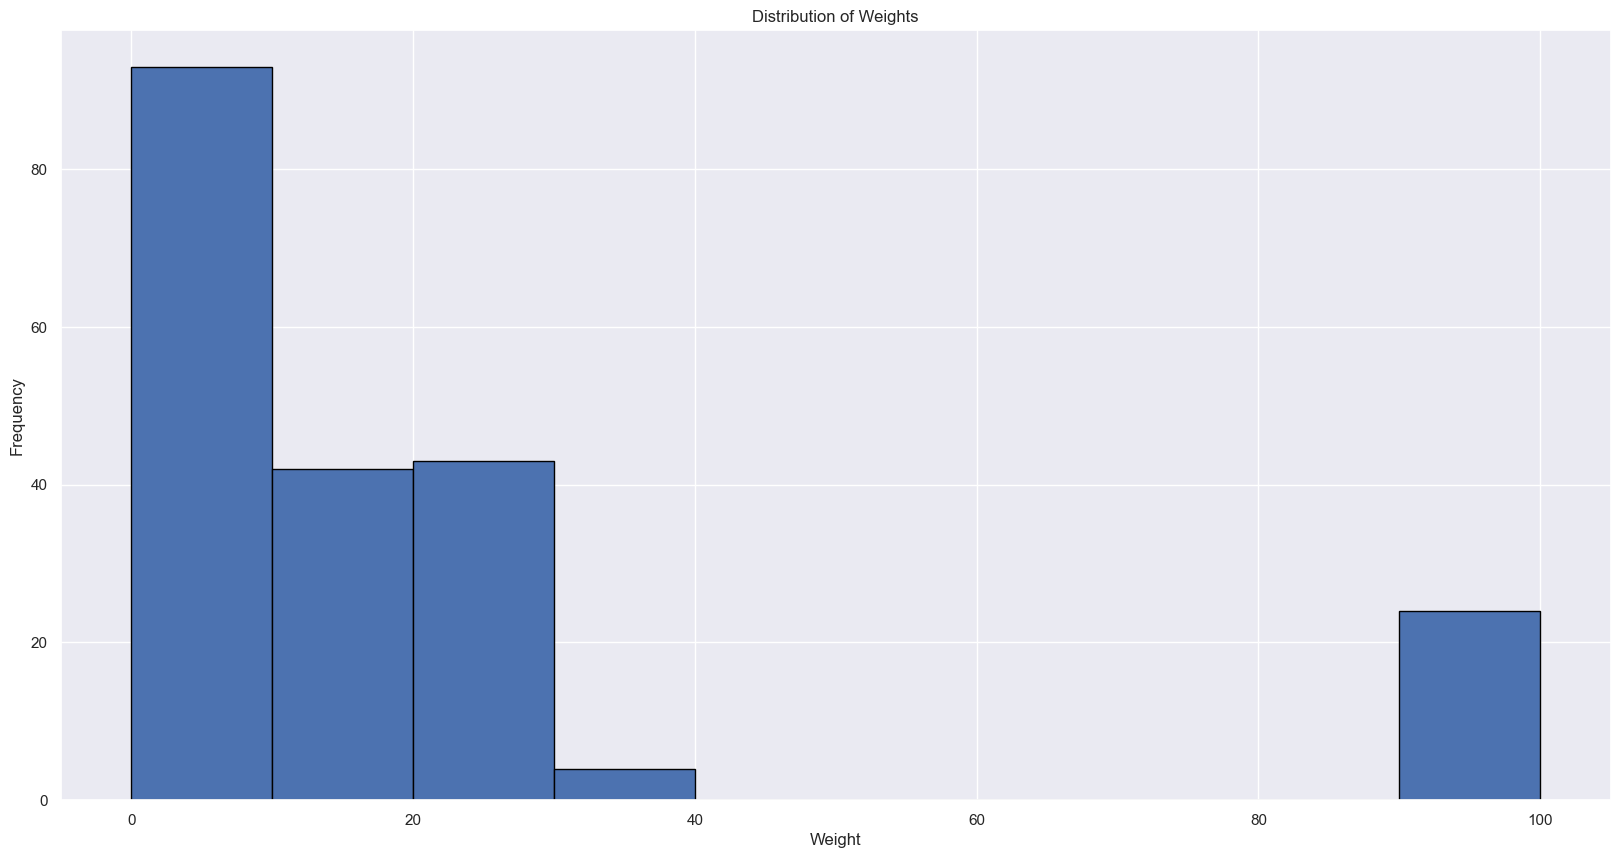

In [208]:
plt.hist(assessmentsF['weight'], bins=10, edgecolor='black')
plt.title('Distribution of Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

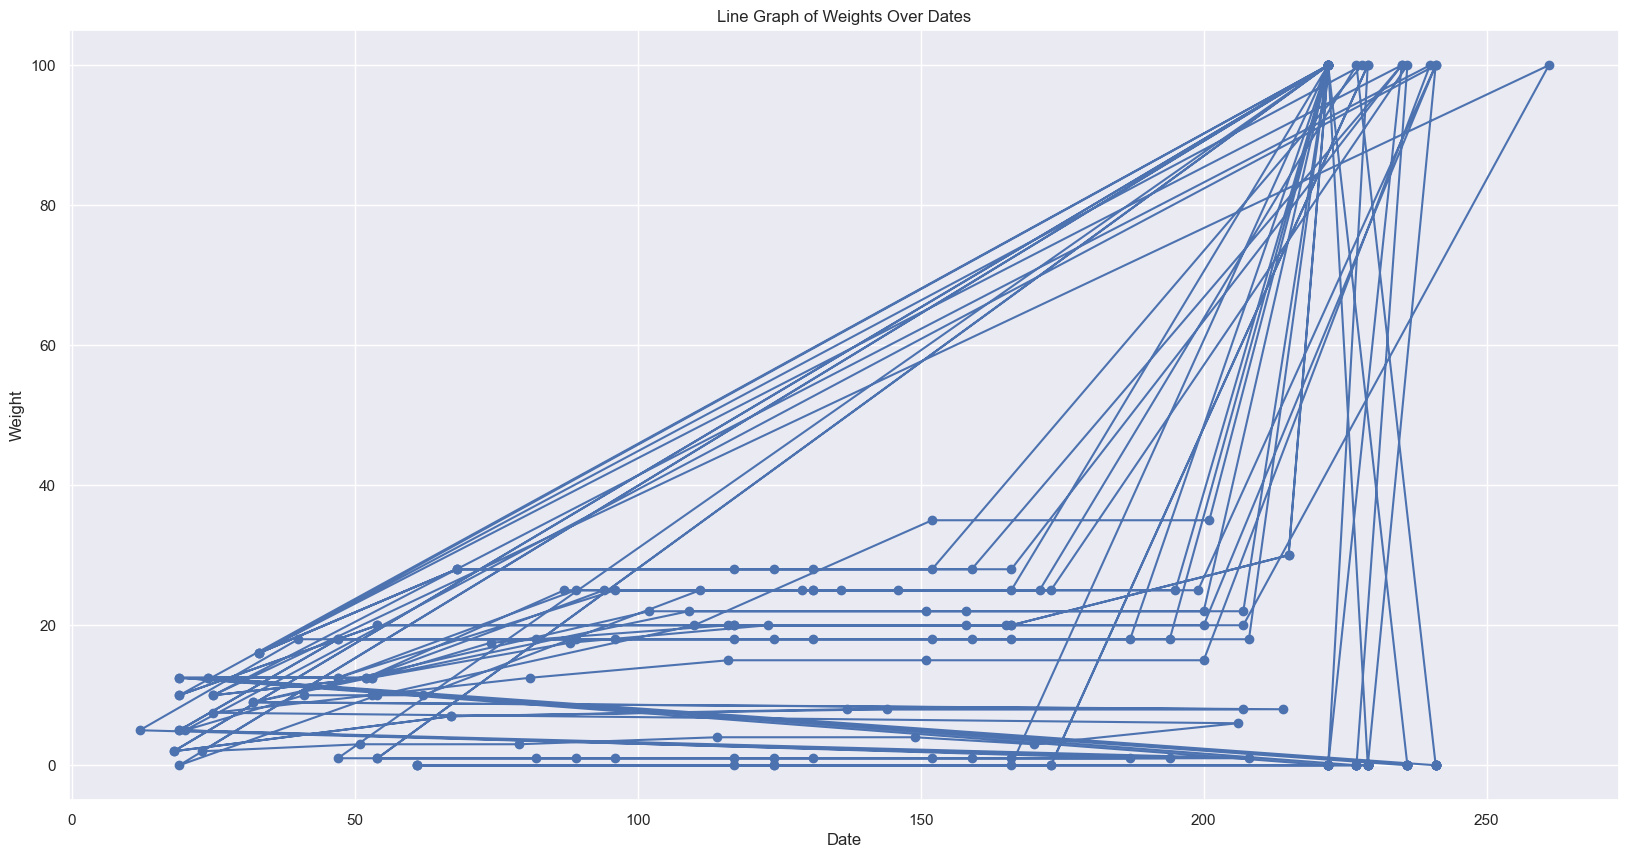

In [210]:
plt.plot(assessmentsF['date'], assessmentsF['weight'], marker='o')
plt.title('Line Graph of Weights Over Dates')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.show()

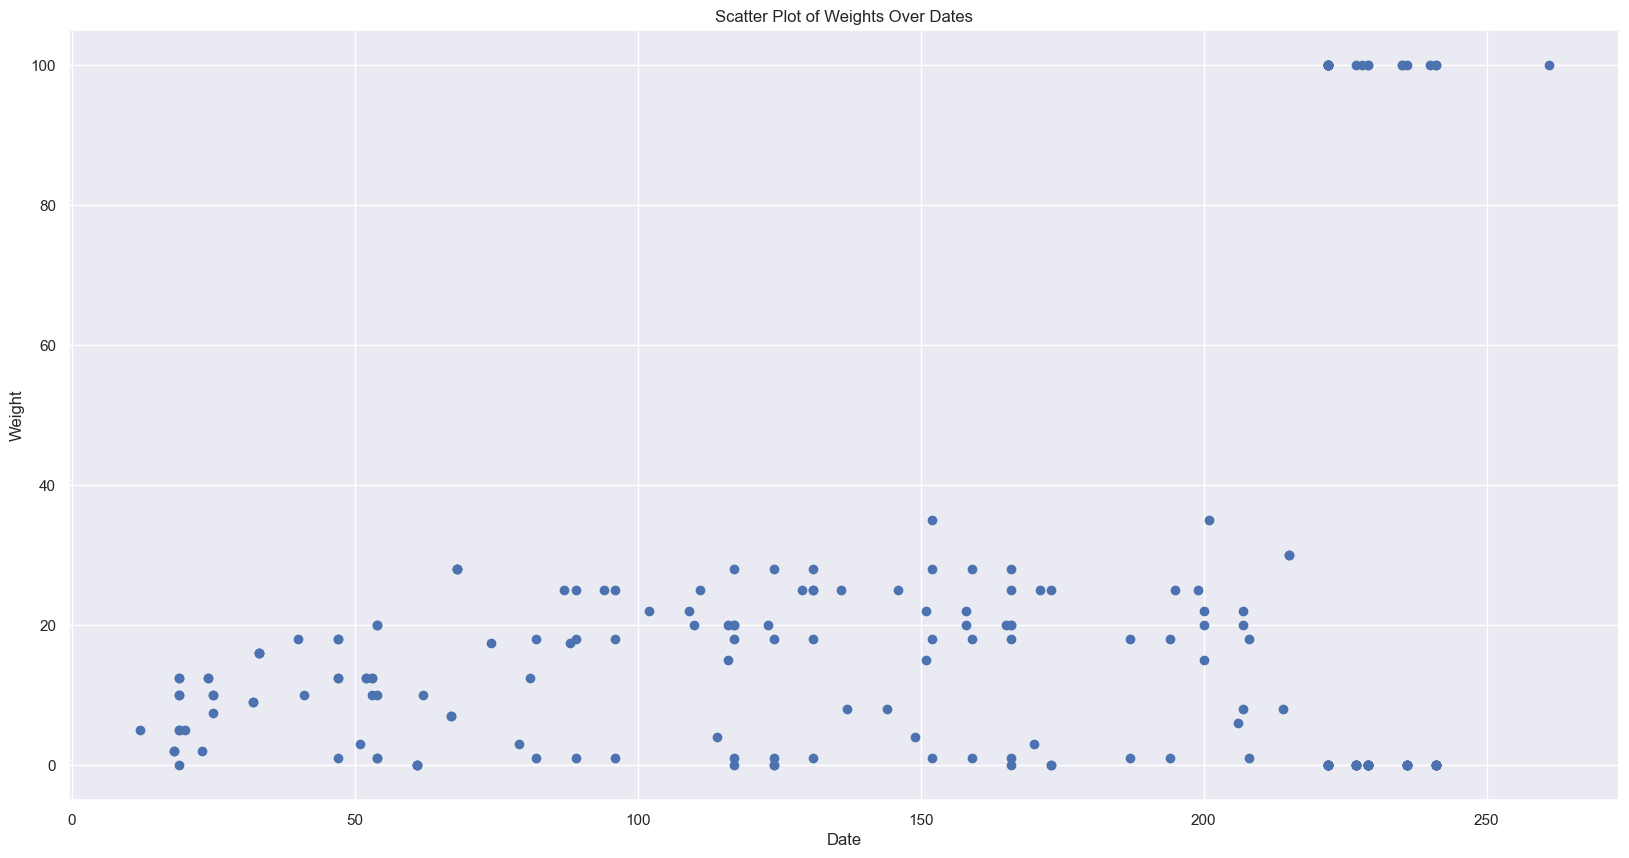

In [211]:
plt.scatter(assessmentsF['date'], assessmentsF['weight'])
plt.title('Scatter Plot of Weights Over Dates')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.show()

In [213]:
courses = pd.read_csv("courses.csv")
print(courses)

   code_module code_presentation  module_presentation_length
0          AAA             2013J                         268
1          AAA             2014J                         269
2          BBB             2013J                         268
3          BBB             2014J                         262
4          BBB             2013B                         240
5          BBB             2014B                         234
6          CCC             2014J                         269
7          CCC             2014B                         241
8          DDD             2013J                         261
9          DDD             2014J                         262
10         DDD             2013B                         240
11         DDD             2014B                         241
12         EEE             2013J                         268
13         EEE             2014J                         269
14         EEE             2014B                         241
15         FFF          

In [214]:
num_examples, num_features = courses.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 22
Number of features: 3


In [215]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [216]:
#Displaying data types
print(courses.dtypes)

#Displaying descriptive statistics
print(courses.describe())

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object
       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000


In [217]:
courses.describe #A little prettier descriptive statistics

<bound method NDFrame.describe of    code_module code_presentation  module_presentation_length
0          AAA             2013J                         268
1          AAA             2014J                         269
2          BBB             2013J                         268
3          BBB             2014J                         262
4          BBB             2013B                         240
5          BBB             2014B                         234
6          CCC             2014J                         269
7          CCC             2014B                         241
8          DDD             2013J                         261
9          DDD             2014J                         262
10         DDD             2013B                         240
11         DDD             2014B                         241
12         EEE             2013J                         268
13         EEE             2014J                         269
14         EEE             2014B                   

In [218]:
#Descriptive data statistics
numerical_columns = courses.select_dtypes(include=['int', 'float'])

for column in numerical_columns.columns:
    column_mean = numerical_columns[column].mean()
    column_std = numerical_columns[column].std()
    column_median = numerical_columns[column].median()
    
    print(f"Feature: {column}")
    print(f"Mean: {column_mean}")
    print(f"Standard Deviation: {column_std}")
    print(f"Median: {column_median}\n")

Feature: module_presentation_length
Mean: 255.54545454545453
Standard Deviation: 13.654677456835678
Median: 261.5



In [219]:
courses.nunique() #Checking if there are any monotonous attributes

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [220]:
courses.isna().sum() #Checking for missing values

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [221]:
courses_ohe=courses.copy()
#Definiramo encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(courses[['code_module','code_presentation']])
#Transformacija podataka
courses_ohe = encoder.transform(courses[['code_module','code_presentation']])
courses_ohe = pd.DataFrame(courses_ohe.toarray(), columns=encoder.get_feature_names_out(['code_module','code_presentation']))
courses_ohe

,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [222]:
courses= pd.concat((courses, courses_ohe), axis=1)
courses

,code_module,code_presentation,module_presentation_length,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AAA,2014J,269,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,BBB,2013J,268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,BBB,2014J,262,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,BBB,2013B,240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,BBB,2014B,234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,CCC,2014J,269,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,CCC,2014B,241,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,DDD,2013J,261,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,DDD,2014J,262,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [223]:
filename="coursesF.csv"
courses.to_csv(filename, index=False)
print(pd.read_csv(filename))

   code_module code_presentation  module_presentation_length  code_module_AAA  \
0          AAA             2013J                         268              1.0   
1          AAA             2014J                         269              1.0   
2          BBB             2013J                         268              0.0   
3          BBB             2014J                         262              0.0   
4          BBB             2013B                         240              0.0   
5          BBB             2014B                         234              0.0   
6          CCC             2014J                         269              0.0   
7          CCC             2014B                         241              0.0   
8          DDD             2013J                         261              0.0   
9          DDD             2014J                         262              0.0   
10         DDD             2013B                         240              0.0   
11         DDD             2

In [224]:
coursesF = pd.read_csv("coursesF.csv")
coursesF

,code_module,code_presentation,module_presentation_length,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,AAA,2013J,268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AAA,2014J,269,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,BBB,2013J,268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,BBB,2014J,262,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,BBB,2013B,240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,BBB,2014B,234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,CCC,2014J,269,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,CCC,2014B,241,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,DDD,2013J,261,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,DDD,2014J,262,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


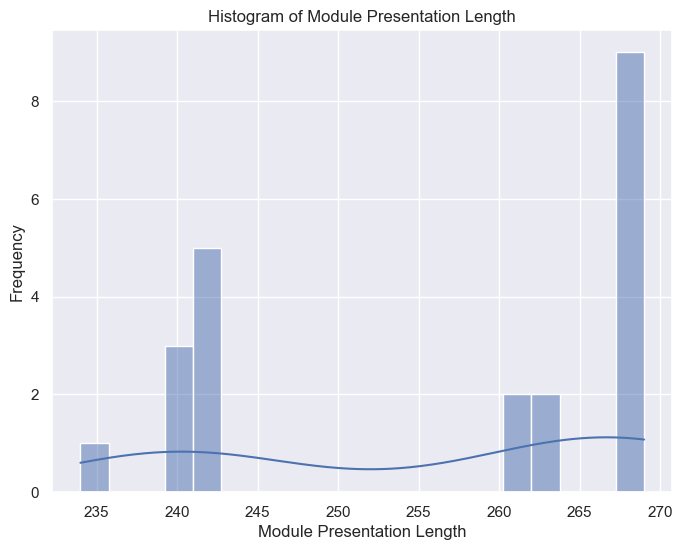

In [225]:
plt.figure(figsize=(8, 6))
sns.histplot(coursesF['module_presentation_length'], bins=20, kde=True)
plt.title('Histogram of Module Presentation Length')
plt.xlabel('Module Presentation Length')
plt.ylabel('Frequency')
plt.show()

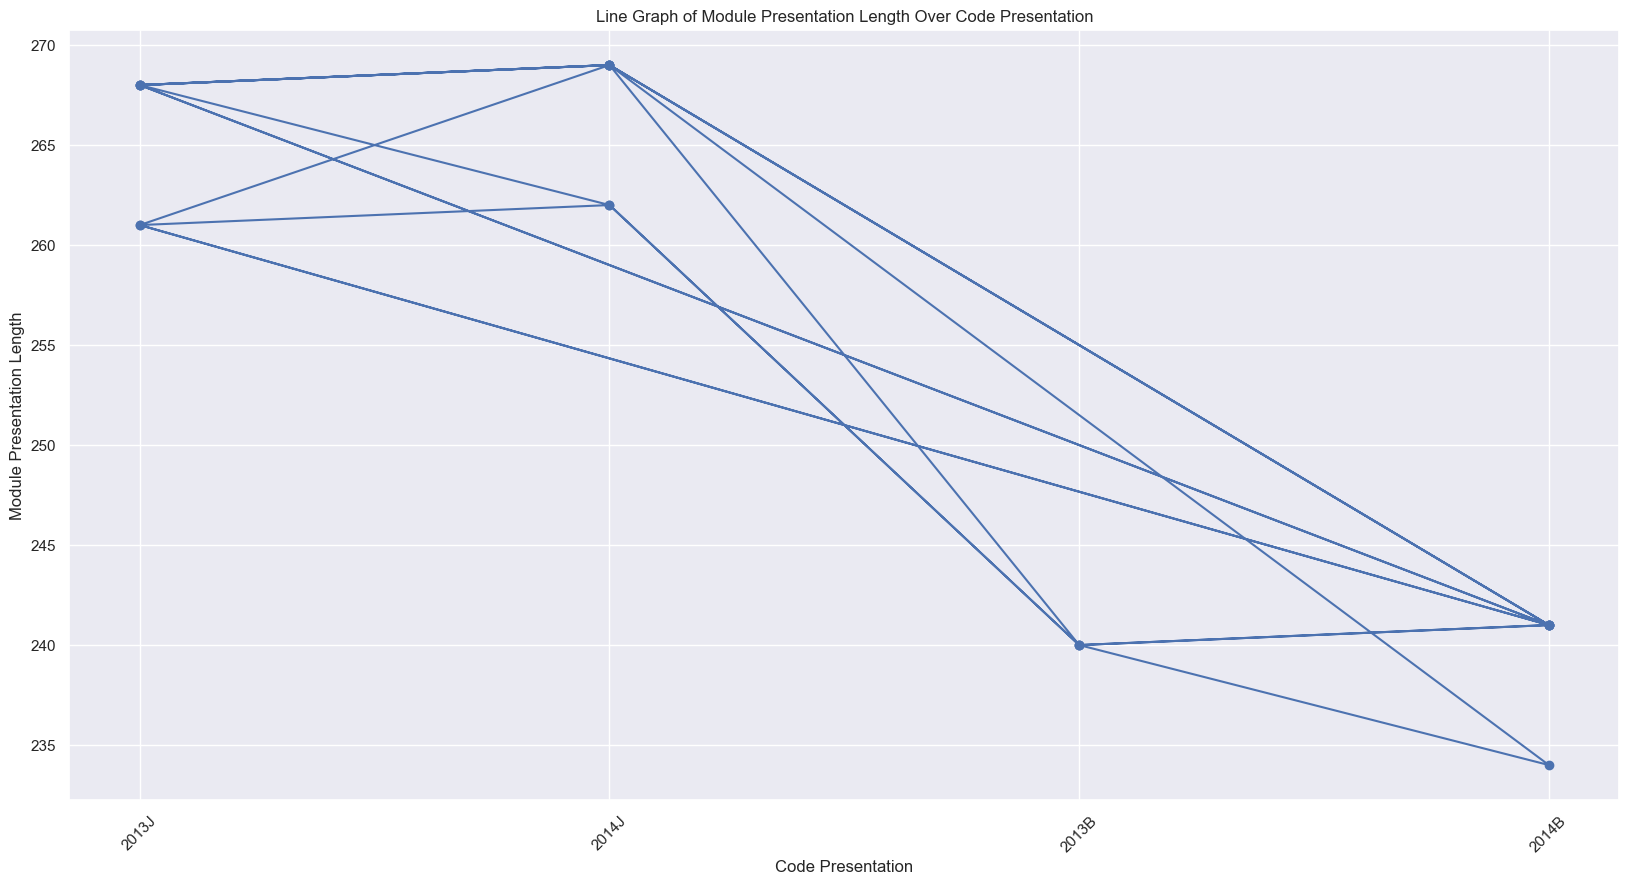

In [226]:
plt.plot(coursesF['code_presentation'], coursesF['module_presentation_length'], marker='o')
plt.title('Line Graph of Module Presentation Length Over Code Presentation')
plt.xlabel('Code Presentation')
plt.ylabel('Module Presentation Length')
plt.xticks(rotation=45)
plt.show()

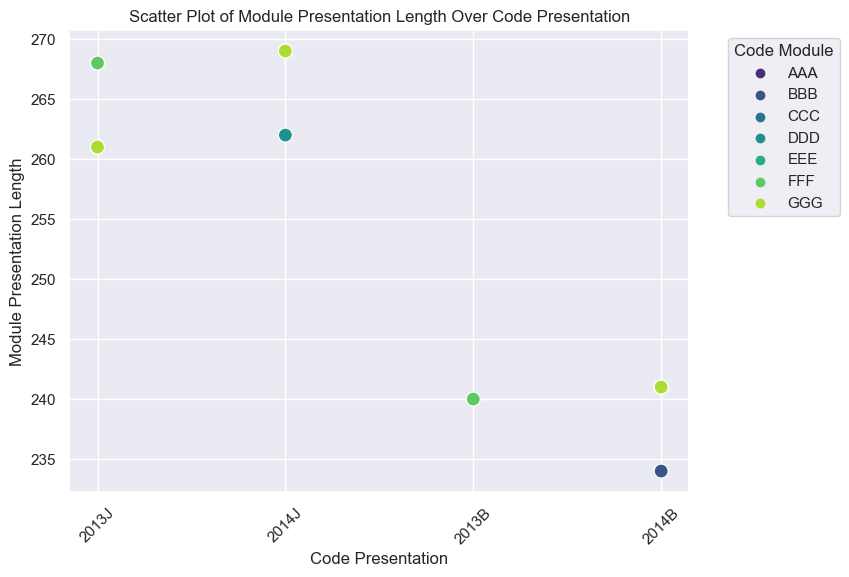

In [227]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='code_presentation', y='module_presentation_length', data=coursesF, hue='code_module', palette='viridis', s=100)
plt.title('Scatter Plot of Module Presentation Length Over Code Presentation')
plt.xlabel('Code Presentation')
plt.ylabel('Module Presentation Length')
plt.legend(title='Code Module', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [229]:
studentAssessment = pd.read_csv("studentAssessment.csv")
print(studentAssessment)

        id_assessment  id_student  date_submitted  is_banked  score
0                1752       11391              18          0   78.0
1                1752       28400              22          0   70.0
2                1752       31604              17          0   72.0
3                1752       32885              26          0   69.0
4                1752       38053              19          0   79.0
...               ...         ...             ...        ...    ...
173907          37443      527538             227          0   60.0
173908          37443      534672             229          0  100.0
173909          37443      546286             215          0   80.0
173910          37443      546724             230          0  100.0
173911          37443      558486             224          0   80.0

[173912 rows x 5 columns]


In [230]:
num_examples, num_features = studentAssessment.shape

print(f"Number of examples: {num_examples}")
print(f"Number of features: {num_features}")

Number of examples: 173912
Number of features: 5


In [231]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [232]:
#Displaying data types
print(studentAssessment.dtypes)

#Displaying descriptive statistics
print(studentAssessment.describe())

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000  


In [233]:
studentAssessment.describe #A little prettier descriptive statistics

<bound method NDFrame.describe of         id_assessment  id_student  date_submitted  is_banked  score
0                1752       11391              18          0   78.0
1                1752       28400              22          0   70.0
2                1752       31604              17          0   72.0
3                1752       32885              26          0   69.0
4                1752       38053              19          0   79.0
...               ...         ...             ...        ...    ...
173907          37443      527538             227          0   60.0
173908          37443      534672             229          0  100.0
173909          37443      546286             215          0   80.0
173910          37443      546724             230          0  100.0
173911          37443      558486             224          0   80.0

[173912 rows x 5 columns]>

In [234]:
#Descriptive data statistics
numerical_columns = studentAssessment.select_dtypes(include=['int', 'float'])

for column in numerical_columns.columns:
    column_mean = numerical_columns[column].mean()
    column_std = numerical_columns[column].std()
    column_median = numerical_columns[column].median()
    
    print(f"Feature: {column}")
    print(f"Mean: {column_mean}")
    print(f"Standard Deviation: {column_std}")
    print(f"Median: {column_median}\n")

Feature: id_assessment
Mean: 26553.803555821334
Standard Deviation: 8829.784253518274
Median: 25359.0

Feature: id_student
Mean: 705150.7172248034
Standard Deviation: 552395.1909985029
Median: 585208.0

Feature: date_submitted
Mean: 116.03294194765168
Standard Deviation: 71.48414778039763
Median: 116.0

Feature: is_banked
Mean: 0.010976815860895165
Standard Deviation: 0.10419399118521291
Median: 0.0

Feature: score
Mean: 75.7995729226023
Standard Deviation: 18.798107229732548
Median: 80.0



In [235]:
studentAssessment.nunique() #Checking if there are any monotonous attributes

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [236]:
studentAssessment.isna().sum() #Checking for missing values

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [237]:
studentAssessment['score'].fillna(studentAssessment['score'].mode()[0], inplace=True)

In [238]:
studentAssessment.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [239]:
filename="studentAssessmentF.csv"
studentAssessment.to_csv(filename, index=False)
print(pd.read_csv(filename))

        id_assessment  id_student  date_submitted  is_banked  score
0                1752       11391              18          0   78.0
1                1752       28400              22          0   70.0
2                1752       31604              17          0   72.0
3                1752       32885              26          0   69.0
4                1752       38053              19          0   79.0
...               ...         ...             ...        ...    ...
173907          37443      527538             227          0   60.0
173908          37443      534672             229          0  100.0
173909          37443      546286             215          0   80.0
173910          37443      546724             230          0  100.0
173911          37443      558486             224          0   80.0

[173912 rows x 5 columns]


In [240]:
studentAssessmentF = pd.read_csv("studentAssessmentF.csv")
studentAssessmentF

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


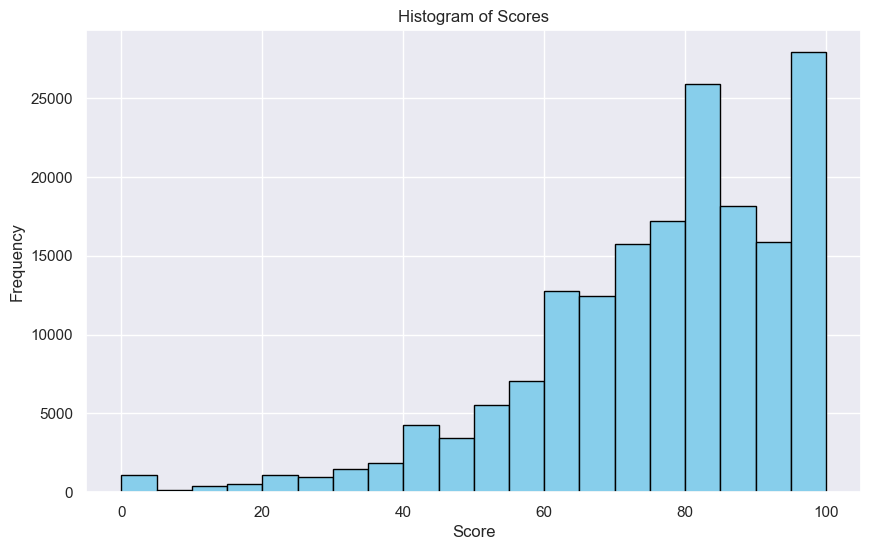

In [241]:
plt.figure(figsize=(10, 6))
plt.hist(studentAssessmentF['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

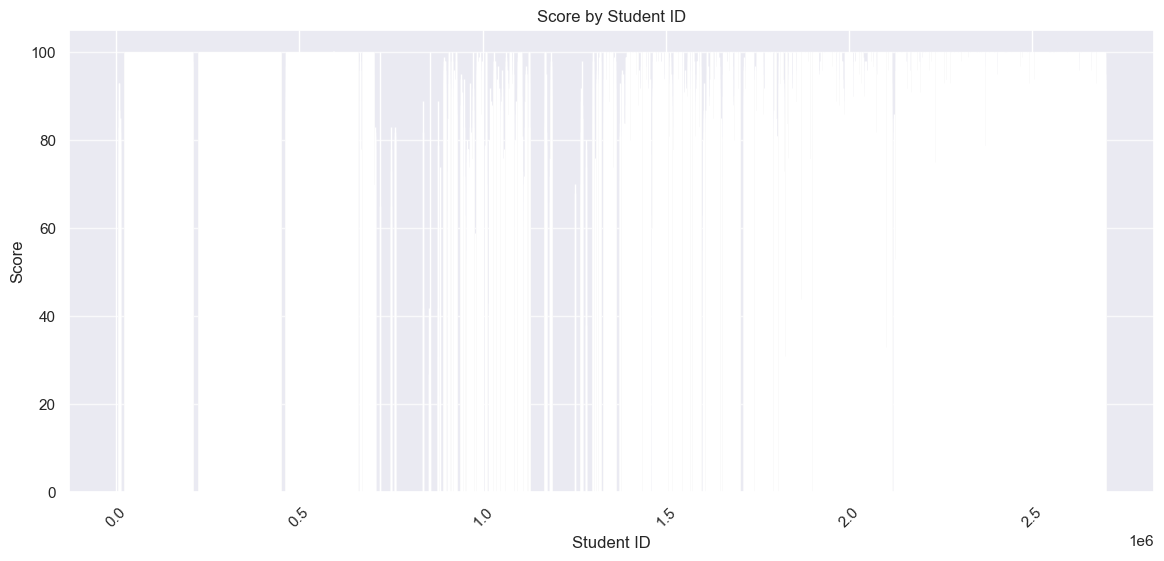

In [252]:
plt.figure(figsize=(14, 6))

plt.bar(studentAssessmentF['id_student'], studentAssessmentF['score'], color='skyblue') 

plt.title('Score by Student ID')
plt.xlabel('Student ID')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.show()

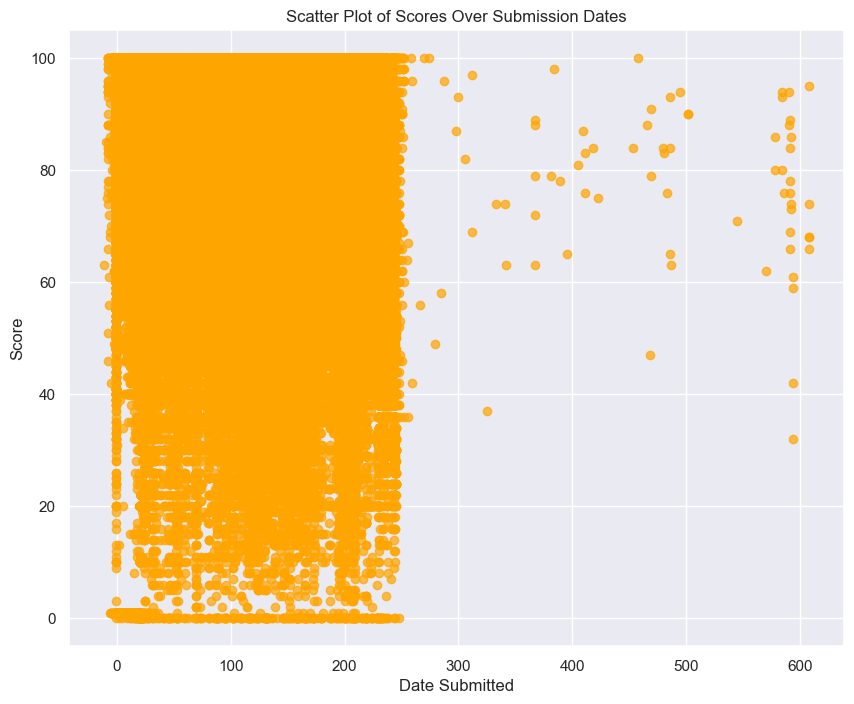

In [244]:
plt.figure(figsize=(10, 8))
plt.scatter(studentAssessmentF['date_submitted'], studentAssessmentF['score'], color='orange', alpha=0.7)
plt.title('Scatter Plot of Scores Over Submission Dates')
plt.xlabel('Date Submitted')
plt.ylabel('Score')
plt.show()